Saving healthcare_dataset.csv to healthcare_dataset (2).csv


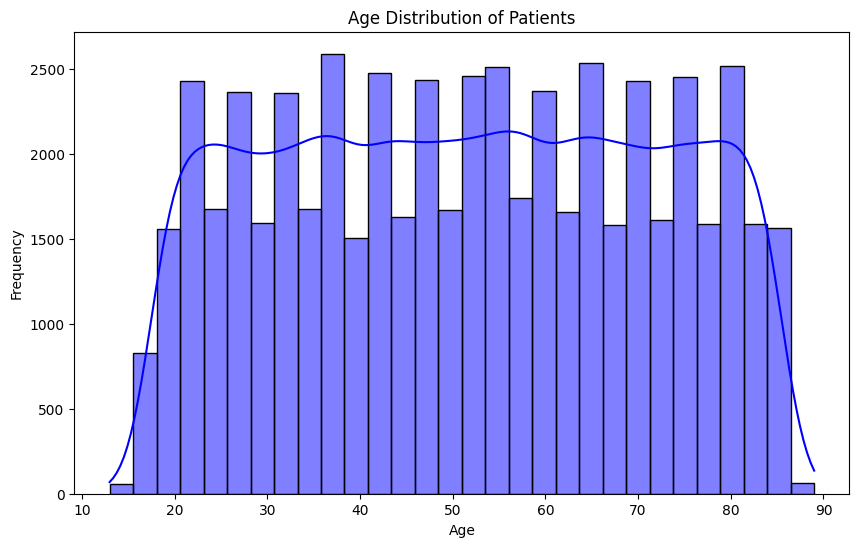

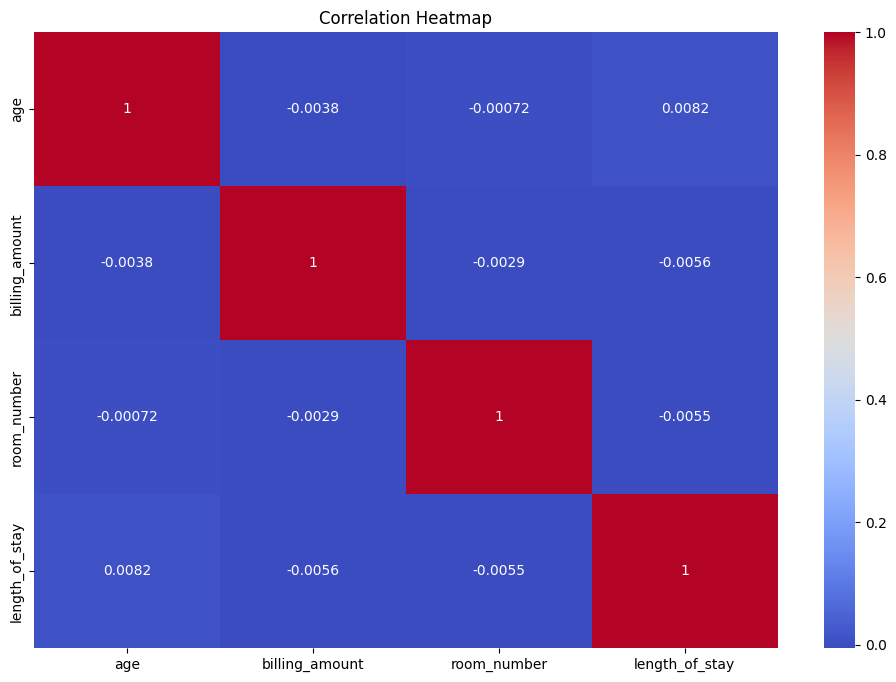

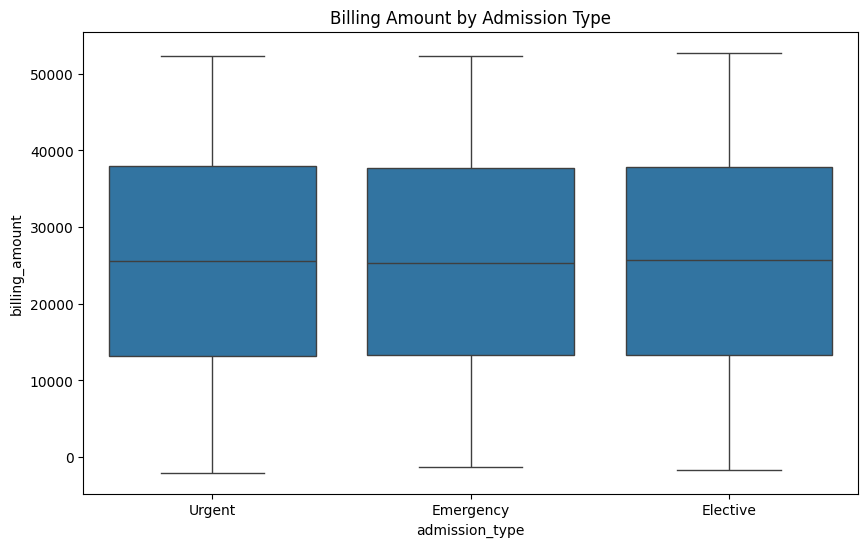

Mean Squared Error (MSE): 199037287.4738507
R-squared (R2) Score: -0.0006429675297239257


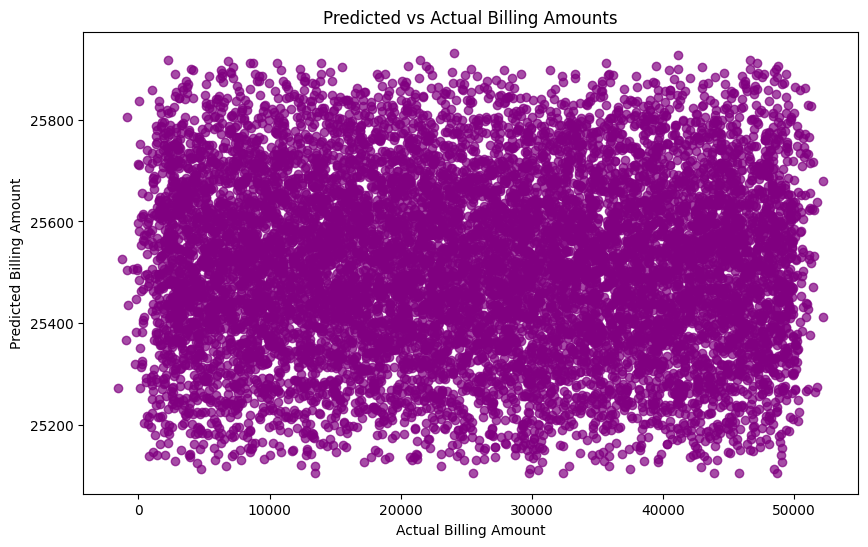

Project Complete: Healthcare Cost Analysis and Forecasting
Visualizations saved in the images/ directory.
Model saved in the models/ directory as billing_prediction_model.pkl


In [5]:


from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os
import joblib

# Ensure the 'images' directory exists
os.makedirs('images', exist_ok=True)
os.makedirs('models', exist_ok=True)

# Load the dataset
data_path = 'healthcare_dataset.csv'
df = pd.read_csv(data_path)

# Data Cleaning and Preprocessing
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert date columns to datetime format
df['date_of_admission'] = pd.to_datetime(df['date_of_admission'])
df['discharge_date'] = pd.to_datetime(df['discharge_date'])

# Calculate length of hospital stay
df['length_of_stay'] = (df['discharge_date'] - df['date_of_admission']).dt.days

# Handle incorrect or missing values (Example: Replace negative stays with median)
median_stay = df.loc[df['length_of_stay'] > 0, 'length_of_stay'].median()
df['length_of_stay'] = df['length_of_stay'].apply(lambda x: median_stay if x < 0 else x)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('images/age_distribution.png')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('images/correlation_heatmap.png')
plt.show()

# Analyze Billing Amount by Admission Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='admission_type', y='billing_amount', data=df)
plt.title('Billing Amount by Admission Type')
plt.savefig('images/billing_by_admission_type.png')
plt.show()

# Predictive Analysis: Billing Amount Prediction
# Feature Selection
X = df[['age', 'length_of_stay', 'room_number']]
y = df['billing_amount']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

# Save the model
joblib.dump(model, 'models/billing_prediction_model.pkl')

# Final Report Plot: Predicted vs Actual Billing Amounts
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple')
plt.xlabel('Actual Billing Amount')
plt.ylabel('Predicted Billing Amount')
plt.title('Predicted vs Actual Billing Amounts')
plt.savefig('images/predicted_vs_actual.png')
plt.show()

# Project Summary Report Preparation
print("Project Complete: Healthcare Cost Analysis and Forecasting")
print("Visualizations saved in the images/ directory.")
print("Model saved in the models/ directory as billing_prediction_model.pkl")
